In [0]:
!pip install opencv-python

In [0]:
import numpy as np
import math
import cv2 
import os
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [0]:
im = cv2.imread('/content/pvn.jpg')
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
im2, contours, hierarchy = cv2.findContours(thresh, 1, 2)

In [0]:
# cnt=contours[4]
# cv2.drawContours(im, contours, -1, (0,255,0), 3)
# cv2_imshow(im)


In [0]:
# for cnt in contours:
#   x,y,w,h = cv2.boundingRect(cnt)
#   cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)
# cv2_imshow(im)

In [0]:
groups=[]
minRec=63
maxRec=2000
for cnt in contours:
  x,y,w,h = cv2.boundingRect(cnt)
  if(w*h>minRec and w*h<maxRec):
    groups.append([x,y,w,h])
    cv2.rectangle(im,(x,y),(x+w,y+h),(0,255,0),2)
# print(len(groups))
# cv2_imshow(im)

In [0]:
# def distance(rec1,rec2):
#   return (((int(rec2[0])-int(rec1[0]))**2+(int(rec2[1])-int(rec1[1]))**2)**0.5)

# # distance([1,2],[3,4])

# max_d= 75
# recs=[]
# dictGroups={}
# j=1
# i=0
# groupName=0
# for cnt in contours:
#   x,y,w,h = cv2.boundingRect(cnt)
#   if(w*h>minRec and w*h<maxRec):
#     while(len(groups)>0):
#       while(j<len(groups)):
#         if(distance(groups[i],groups[j])<=max_d):
#           recs.append(groups[j])
#           groups.pop(j)
#         j+=1
#       recs.append(groups[i])
#       groups.pop(i)
#       j=1
#       dictGroups[groupName]=recs
#       recs=[]
#       groupName+=1
# #       print(dictGroups[i])
# print('done clustering')

In [164]:
for i,item in enumerate(dictGroups.values()):
  print(i)
  print(item)


0
[[601, 1217, 9, 10], [619, 1196, 9, 25], [611, 1191, 25, 36], [576, 1191, 24, 36]]
1
[[312, 1203, 8, 14], [326, 1187, 37, 36], [303, 1196, 25, 37]]
2
[[83, 1133, 6, 14], [70, 1121, 31, 32], [89, 1117, 13, 12], [98, 1128, 24, 25], [32, 1128, 27, 26], [121, 1118, 27, 35], [159, 1118, 35, 35], [193, 1118, 33, 36]]
3
[[312, 1122, 36, 33], [346, 1120, 18, 44], [286, 1123, 5, 25], [277, 1117, 24, 37], [255, 1118, 21, 35], [238, 1119, 17, 44]]
4
[[614, 1081, 9, 9], [596, 1060, 9, 26], [624, 1055, 24, 36], [589, 1055, 23, 36], [570, 1055, 13, 34]]
5
[[331, 1067, 8, 13], [306, 1054, 9, 25], [323, 1049, 24, 36], [299, 1048, 24, 36], [347, 1049, 17, 45], [276, 1049, 20, 35], [240, 1048, 36, 35]]
6
[[0, 1064, 11, 9]]
7
[[64, 1063, 10, 16], [96, 1058, 13, 25], [108, 1057, 37, 26], [97, 1047, 10, 9], [40, 1058, 20, 26], [82, 1047, 13, 36], [57, 1057, 25, 27], [145, 1058, 24, 25], [168, 1058, 19, 26], [197, 1047, 44, 45]]
8
[[691, 1051, 30, 22]]
9
[[603, 1012, 8, 9], [614, 986, 23, 35], [577, 985, 

In [163]:
import sys
sys.setrecursionlimit(9999)
i=0
j=1
max_d= 40
dictGroups={}
a=0
b=0
recs=[]
copys=groups
groupName=0
isNotRecList=False

def distance(rec1,rec2):
  return (((int(rec2[0])-int(rec1[0]))**2+(int(rec2[1])-int(rec1[1]))**2)**0.5)

def filterRectangle(recsTemp,currCopys):
  recsTemp1=[]
  a=0
  b=0
  isNotRecList=False
  while(a<len(recsTemp)):
    while(b<len(currCopys)):
      if(distance(recsTemp[a],currCopys[b])<=max_d):
        recs.append(currCopys[b])
        recsTemp1.append(currCopys[b])
        currCopys.pop(b)
      b+=1
    a+=1
    b=0
  if(len(recsTemp1)==0):
    isNotRecList=True
  if(isNotRecList):
    isNotRecList=False
    return recs
  return filterRectangle(recsTemp1,currCopys)

while(len(copys)>0):
  recs.append(copys[i])
  copys.pop(i)
  while(j<len(copys)):
    if(distance(recs[-1],copys[j])<=max_d):
      recs.append(copys[j])
      copys.pop(j)
    j+=1
  dictGroups[groupName]=recs
  groupName+=1
  filterRectangle(recs,copys)
  recs=[]
  j=1
print('done clustering')

done clustering


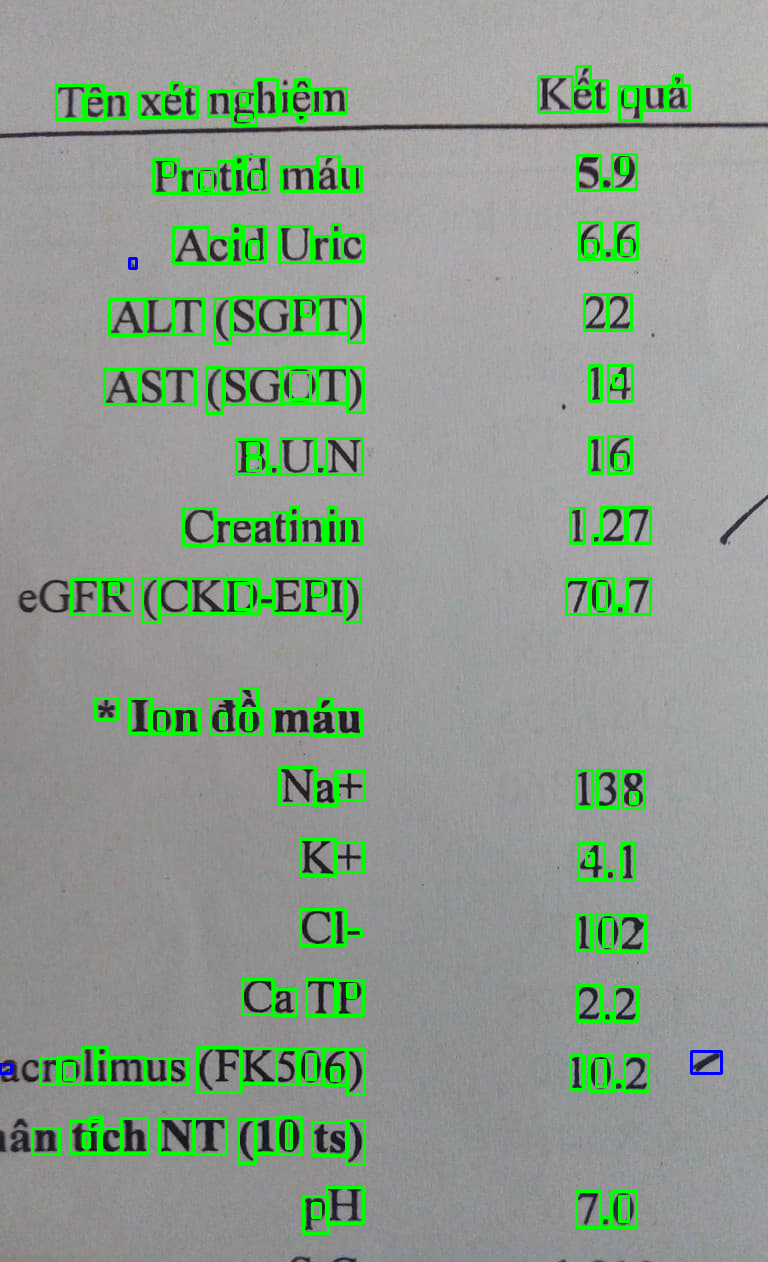

In [166]:
for recGroups in dictGroups.values():
  if len(recGroups)>1:
    for i in recGroups:
      cv2.rectangle(im,(i[0],i[1]),
                  (i[0]+i[2],i[1]+i[3]),(0,255,0),2)
  if len(recGroups)==1:
    for i in recGroups:
      cv2.rectangle(im,(i[0],i[1]),
                  (i[0]+i[2],i[1]+i[3]),(255,0,0),2)
  
cv2_imshow(im)


In [0]:
cv2.rectangle(im,(dictGroups[46][9][0],dictGroups[46][9][1]),
              (dictGroups[46][9][0]+dictGroups[46][9][2],dictGroups[46][9][1]+dictGroups[46][9][3]),(0,255,0),2)
cv2_imshow(im)


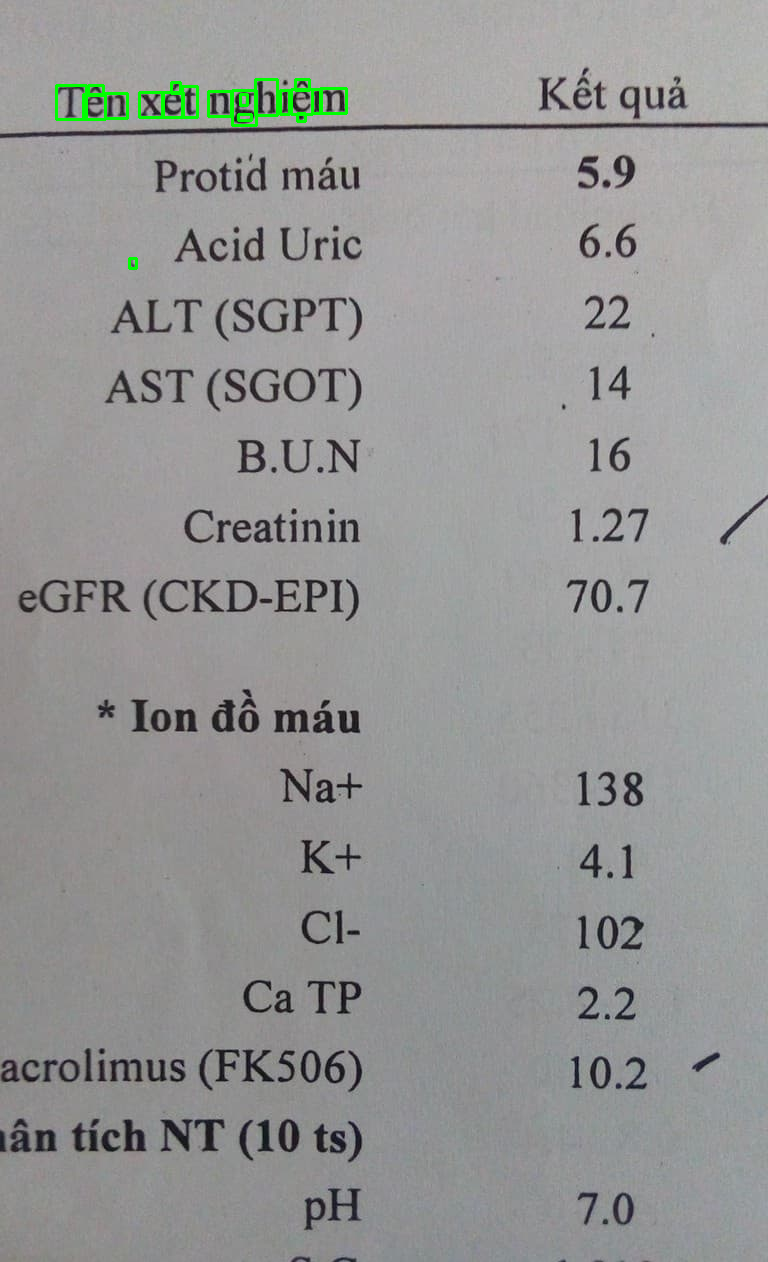

In [169]:
for i in dictGroups[31]:
  cv2.rectangle(im,(i[0],i[1]),(i[0]+i[2],i[1]+i[3]),(0,255,0),2)

cv2_imshow(im)


In [171]:
for i in dictGroups[36]:
  print(i)

[297, 113, 8, 8]
[280, 90, 9, 24]
[312, 89, 9, 24]
[320, 88, 26, 25]
[295, 79, 14, 11]
[291, 89, 21, 25]
[255, 79, 22, 36]
[238, 114, 13, 6]
[240, 94, 7, 11]
[232, 90, 24, 35]
[208, 91, 23, 25]
[182, 86, 15, 31]
[171, 82, 9, 11]
[162, 92, 21, 25]
[139, 92, 24, 25]
[105, 93, 22, 25]
[83, 94, 22, 25]
[88, 85, 15, 10]
[56, 85, 30, 34]


In [183]:
#merging the big rectangle
# def findEdges():
# xMin, yMax = left, top
# xMin, yMin = left, bottom
# xMax, yMax = right, top
# xMax, yMin = right, bottom

class Point:
  def __init__(self,X=0,Y=0):
    self.x=X
    self.y=Y

xMin=999
xMax=999
yMin=999
yMax=999

xPoint=[]
yPoint=[]
coordinates=[]
coordinateRec=[]
for i,item in enumerate(dictGroups[36]):
  xPoint.append(item[0])
  yPoint.append(item[1])

xMin=min(xPoint)
xMax=max(xPoint)
yMin=min(yPoint)
yMax=max(yPoint)
coordinates.append([xMin,xMax,yMin,yMax])

coordinateRec.append([[xMin,yMax],[xMin,yMin],[xMax,yMax],[xMax,yMin]])
# print(coordinates)
print(coordinateRec)
# coordinates


[[[56, 114], [56, 79], [320, 114], [320, 79]]]


264 35


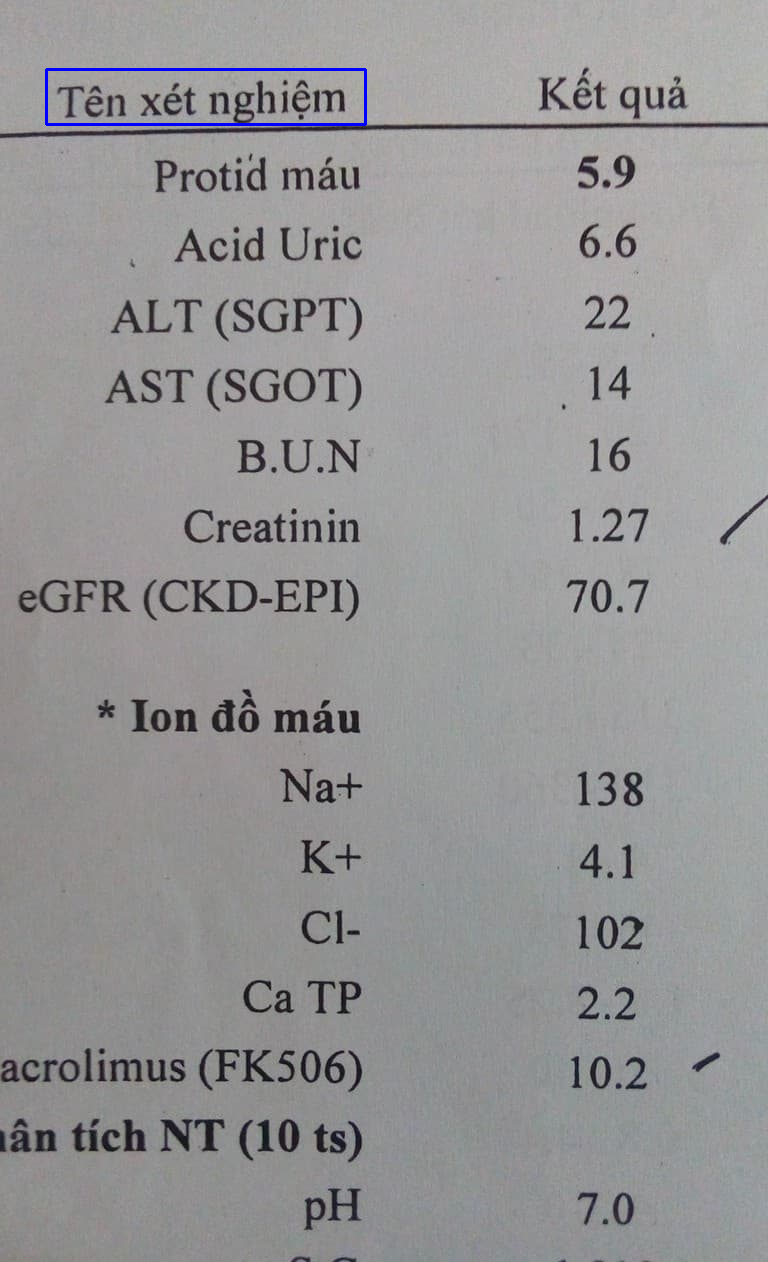

In [204]:
w2 = int(distance( [xMin, yMax],[xMax,yMax]))
h2 = int(distance( [xMin, yMax],[xMin,yMin]))
print(w2,h2)
margin=10
cv2.rectangle(im, (xMin-margin, yMax+margin), (xMax+h2+margin, yMin-margin), (255,0,0), 2)
cv2_imshow(im)

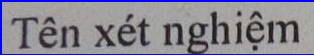

True

In [277]:
crop_img = im[yMax-margin-h2:yMax+margin, xMin-margin:xMin+w2+4*margin]
cv2_imshow(crop_img)
img=cv2.cvtColor(crop_img,cv2.cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/img1.png',img)

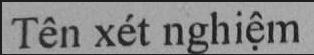

In [279]:
new_img = cv2.imread('/content/img1.png')
cv2_imshow(new_img)